In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

import geoio
import shapely
import ogr

from geoio import DGImage

bbox = (-73.987749,40.745062,-73.981333,40.749809)

geom = {'type': 'Polygon',
        'coordinates': [],
        }
 
ntf_files = ['data/maxar/21SEP11155826-M2AS-505679287020_01_P001/21SEP11155826-M2AS-505679287020_01_P001.NTF',
             'data/maxar/21SEP11155828-M2AS-505679287020_01_P002/21SEP11155828-M2AS-505679287020_01_P002.NTF']


In [38]:
import utm
import numpy as np

def convert_bbox_to_rectangle(bbox):
    return (
        (bbox[0], bbox[1]),
        (bbox[0], bbox[3]),
        (bbox[2], bbox[3]),
        (bbox[2], bbox[1]),
        (bbox[0], bbox[1])
    )


rect = convert_bbox_to_rectangle(bbox)
rect_utm = [utm.from_latlon(lat, lon)[:2] for lon, lat in rect]
geom['coordinates'] = [rect_utm]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


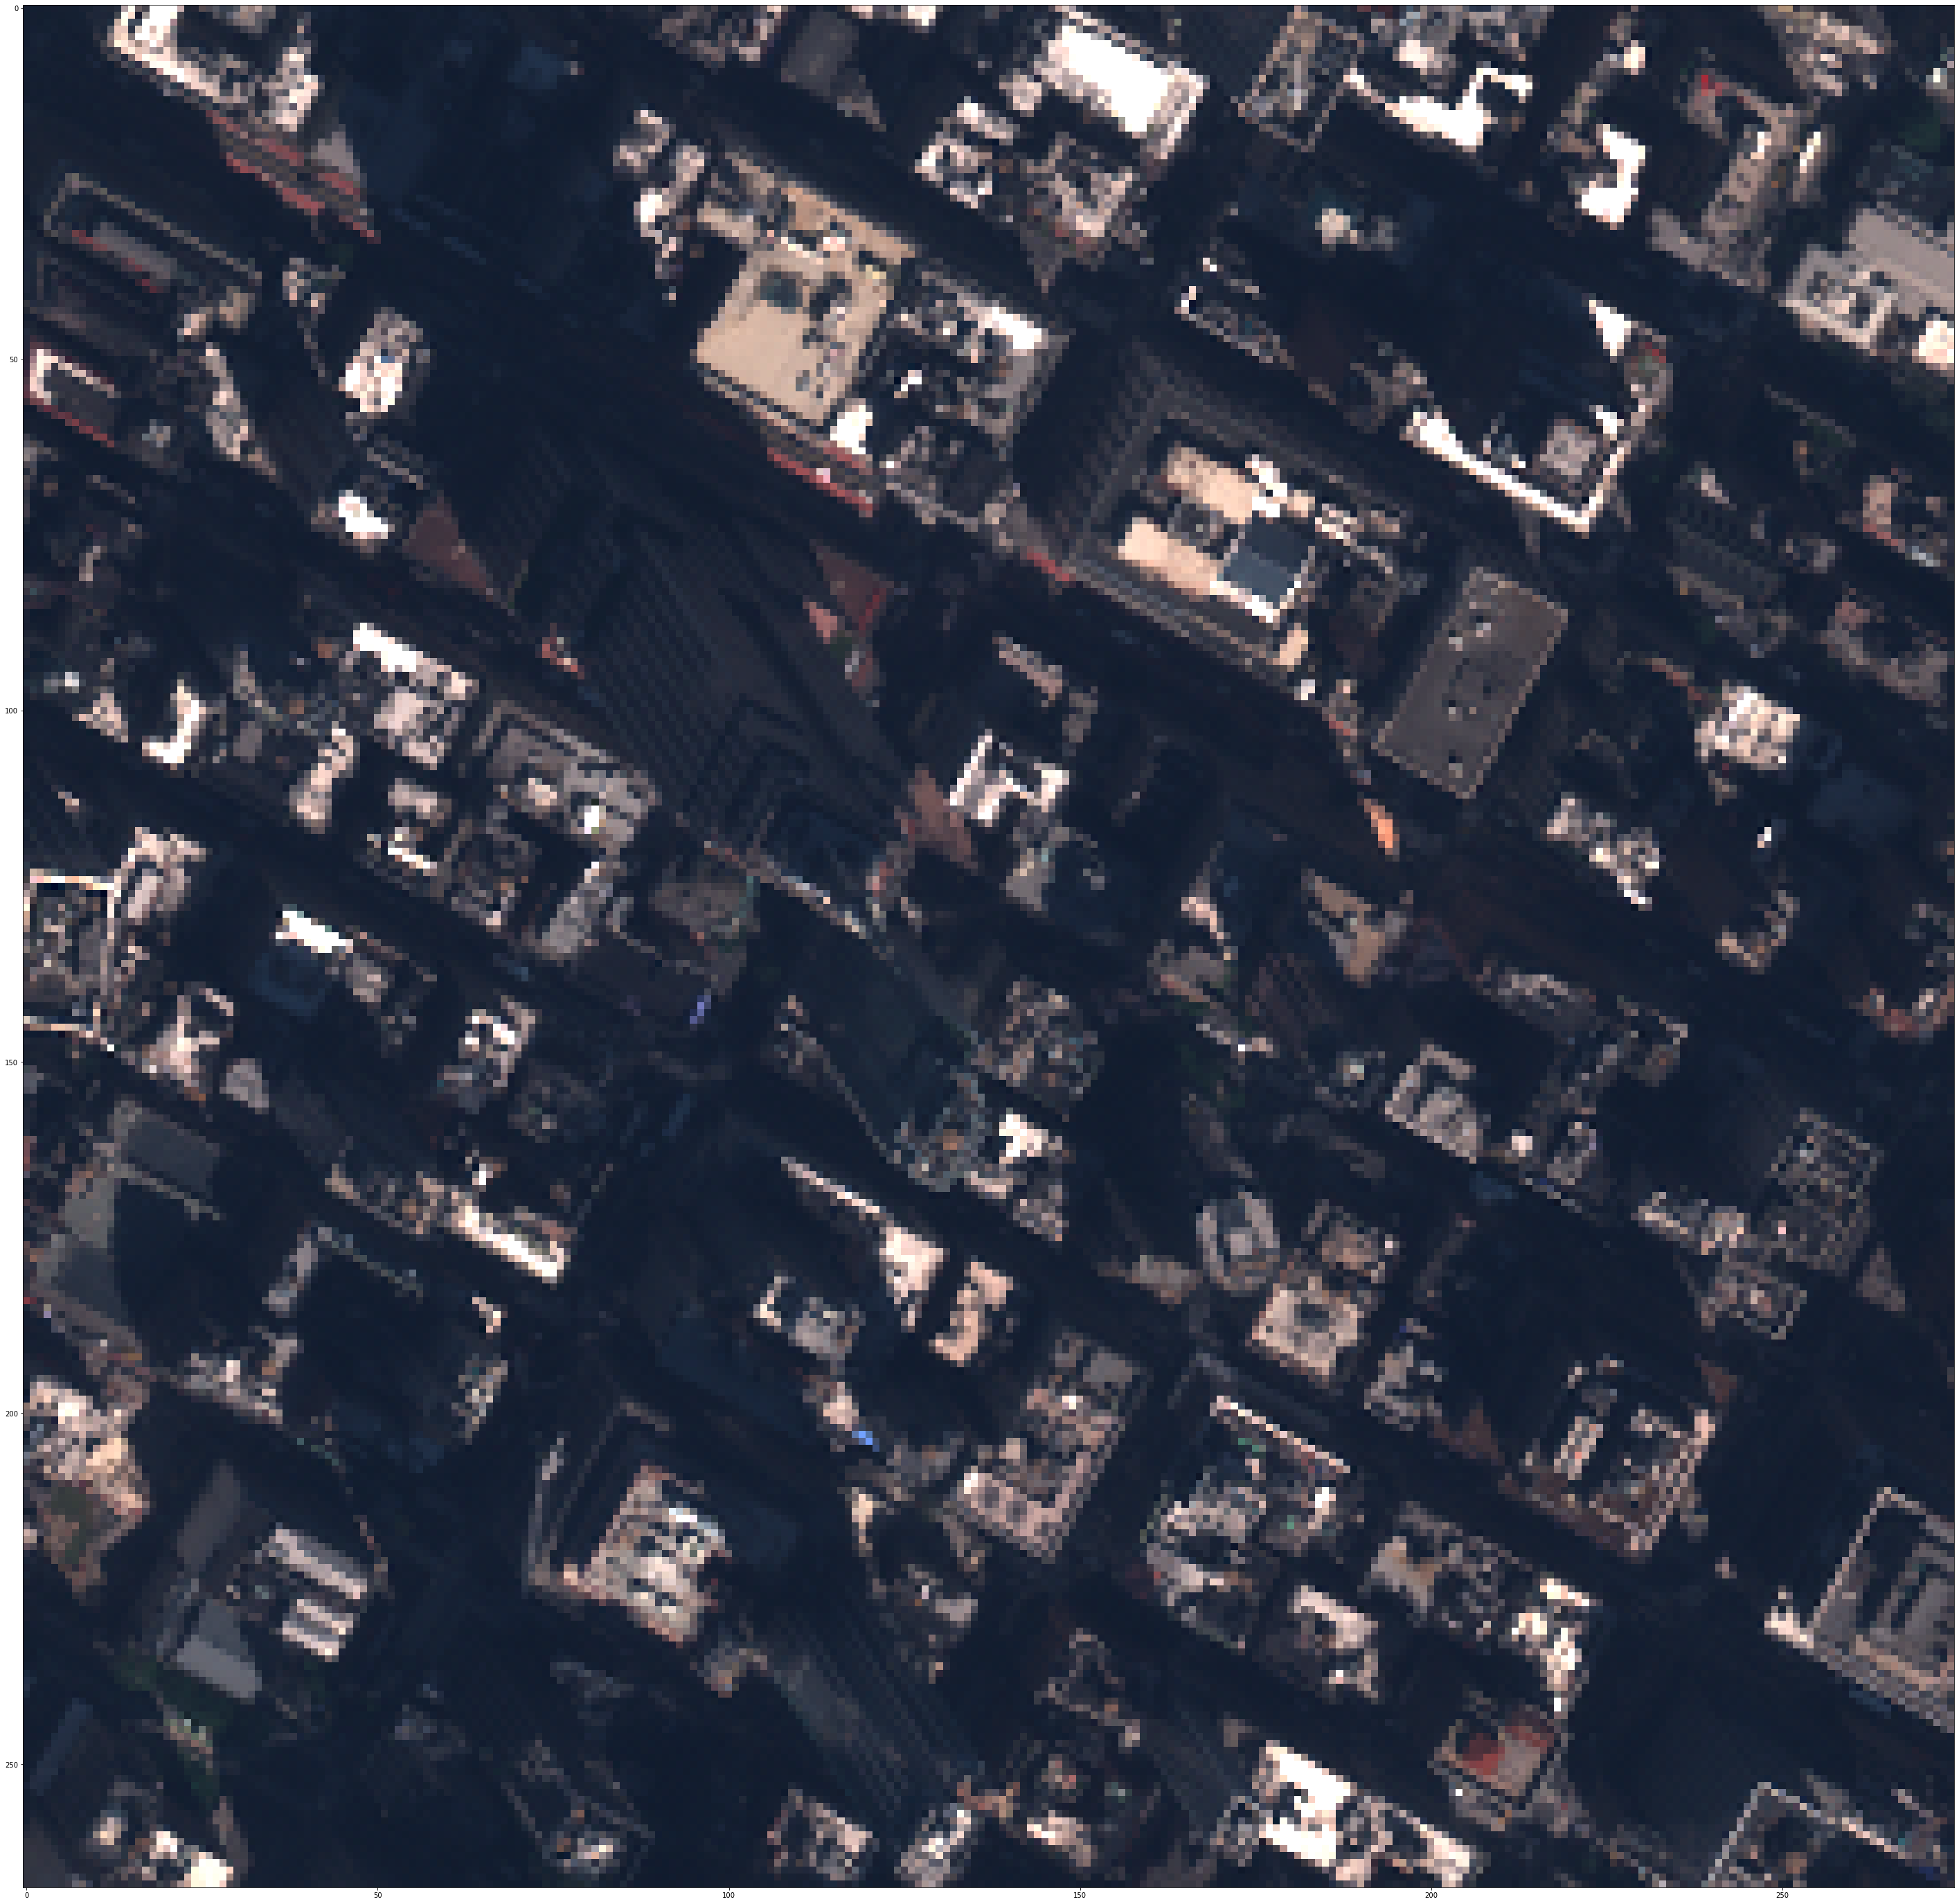

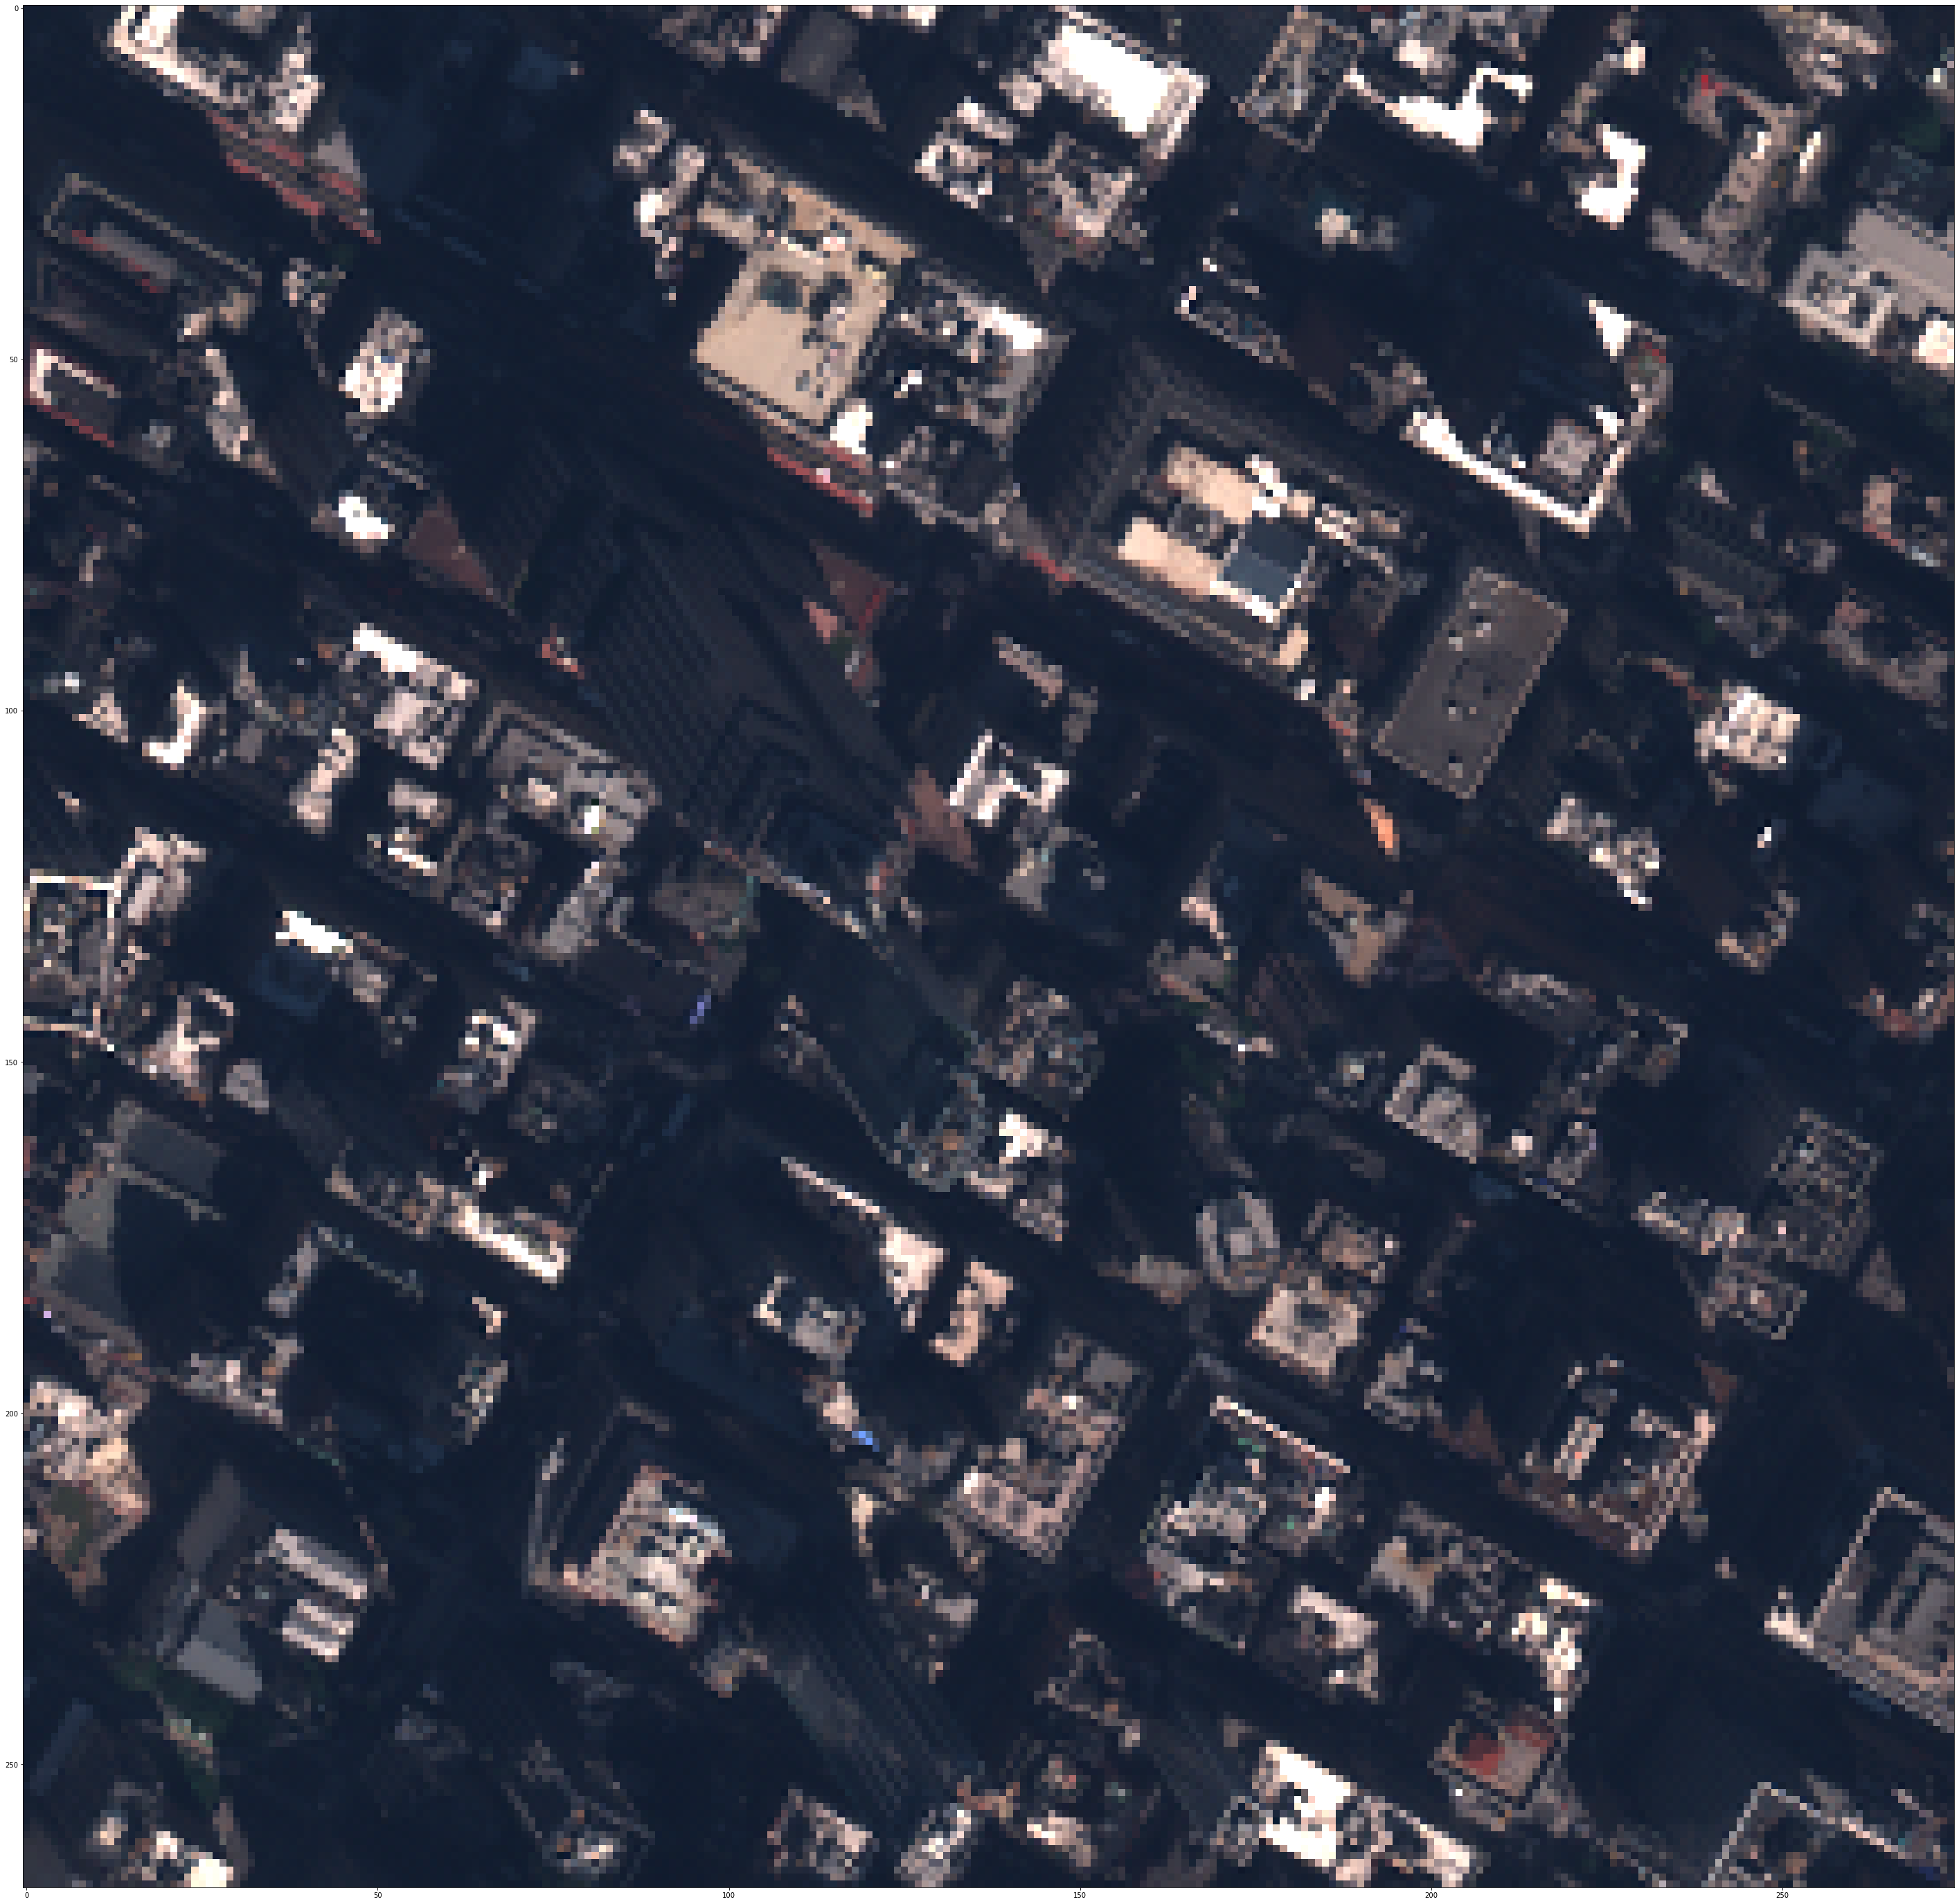

In [46]:
for i, ntf_file in enumerate(ntf_files):
    img = DGImage(ntf_file)
    data = img.get_data(geom = geom, bands=['R', 'G', 'B'], stype='toa')
    fig = plt.figure(figsize = (50,50)) # create a 5 x 5 figure 
    adjusted_img = np.moveaxis(data, 0, -1)/4000
    plt.imshow(adjusted_img)
    # save data to file
    plt.savefig('data/rasters/ny_{i}.png')